In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.stats import ttest_ind

**PART 1**

**1.1**

In [2]:
# Load the dataset
df=pd.read_csv("Building_Energy_Benchmarking.csv")
df.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603


In [3]:
print(df.shape)
print(df.columns,df.dtypes)

(494, 31)
Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emiss

In [4]:
# Calculate the number of missing values in the columns
missing=df.isnull().sum()/len(df)*100
print(missing)

Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat

**1.2**

In [5]:
# dropping the columns which have more than 40% missing value rate
df = df.drop(columns=missing[missing/len(df)*100 > 40].index)


In [6]:
# handling the missing values of the columns which have less than 40 % missing rate
for i in df.columns:
  if missing[i]>0:
    if df[i].dtype=="object":
      df[i]=df[i].fillna(df[i].mode()[0])
    else:
      df[i]=df[i].fillna(df[i].mean())

In [7]:
# checking if the values are all in place
missing=df.isnull().sum()
print(missing)

Property Id                                                              0
Property Name                                                            0
Address 1                                                                0
City                                                                     0
Postal Code                                                              0
Province                                                                 0
Primary Property Type - Self Selected                                    0
Number of Buildings                                                      0
Year Built                                                               0
Property GFA - Self-Reported (m²)                                        0
ENERGY STAR Score                                                        0
Site Energy Use (GJ)                                                     0
Weather Normalized Site Energy Use (GJ)                                  0
Site EUI (GJ/m²)         

**1.3**


In [8]:
# using regex to extract numeric values from the Property GFA column
df['Property GFA - Self-Reported (m²)'] = df['Property GFA - Self-Reported (m²)'].astype(str).apply(lambda x: float(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
# using regex to extract numeric values from the Total GHG Emissions column
df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].astype(str).apply(lambda x: float(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
# using regex to extract numeric values from the Source Energy Use column
df['Source Energy Use (GJ)'] = df['Source Energy Use (GJ)'].astype(str).apply(lambda x: float(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
# using regex to extract Understandable text from the Property Name column column
df['Property Name'] = df['Property Name'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', x))

In [9]:
# using regex to extract to standardise the postal code format
df['Postal Code'] = df['Postal Code'].astype(str).apply(lambda x: re.sub(r'(\w\d\w)[-\s]*(\d\w\d)', r'\1 \2', x))
df['Postal Code'] = df['Postal Code'].str.upper()

In [10]:
df.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,280,152.4,368616,5453,"2,588.40",77834.334091,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,243,31.2,1091854,4725,"2,588.40",77834.334091,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0,0.0,508589,3,2180,77834.334091,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,...,26,1.5,1152308,506,6582,77834.334091,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,253,118.1,508594,4926,"2,588.40",77834.334091,508594.0,236.0,2023,2023-21988603


**PART 2**

**2.1 Statistical Summary**

In [11]:
df.describe()

,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),ENERGY STAR Score,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,1974.151822,44.836364,1.774798,1.810324,4556.811741,2.282753,2.319717,442.242915,158.671660,63.821862,77834.334091,5.997183e+05,278.847635,2020.995951
std,5.659556e+06,0.278281,25.159568,6799.509625,17.443771,1.306700,1.331529,18232.680549,1.597846,1.622897,1078.883226,109.472637,56.835735,35391.691473,9.252178e+05,430.130719,1.414208
min,6.169481e+06,1.000000,1896.000000,1.000000,1.000000,0.060000,0.060000,1.000000,0.110000,0.110000,1.000000,10.200000,0.000000,541.000000,1.040400e+03,0.500000,2019.000000
25%,9.563763e+06,1.000000,1970.000000,2.000000,44.836364,0.990000,1.000000,4.000000,1.312500,1.350000,77.000000,93.100000,33.325000,77834.334091,1.632628e+05,76.175000,2020.000000
50%,9.997794e+06,1.000000,1978.000000,216.500000,44.836364,1.290000,1.310000,36.500000,1.680000,1.690000,173.000000,117.600000,43.900000,77834.334091,5.997183e+05,278.847635,2021.000000
75%,2.198860e+07,1.000000,1996.000000,1448.750000,44.836364,2.065000,2.110000,2079.250000,2.622500,2.652500,445.750000,186.975000,74.050000,77834.334091,5.997183e+05,278.847635,2022.000000
max,2.198863e+07,3.000000,2018.000000,85941.000000,94.000000,8.430000,8.360000,261481.000000,10.130000,10.060000,13067.000000,666.200000,386.000000,447362.900000,9.618604e+06,4472.000000,2023.000000


**2.2 Aggregations**

In [12]:
EUI_by_property = df.groupby('Primary Property Type - Self Selected')['Site EUI (GJ/m²)'].mean().reset_index(name='Mean Site EUI')
GHG_by_year = df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum().reset_index(name='Total GHG Emissions')
top_5_energy = df.nlargest(5, 'Source Energy Use (GJ)')

In [13]:
GHG_by_year.head()

,Year Ending,Total GHG Emissions
0,2019,22766.0
1,2020,23998.0
2,2021,24271.0
3,2022,72301.0
4,2023,75132.0


**2.3 Detecting Outliers Using Regex and IQR**

In [14]:
# calculating the IQR for handling the outliers
Q1 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Total GHG Emissions (Metric Tons CO2e)'] < (Q1 - 1.5 * IQR)) |
              (df['Total GHG Emissions (Metric Tons CO2e)'] > (Q3 + 1.5 * IQR))]
df.loc[outliers.index, 'Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].median()

**Part 3**

**3.1 Time-Series Visualization**

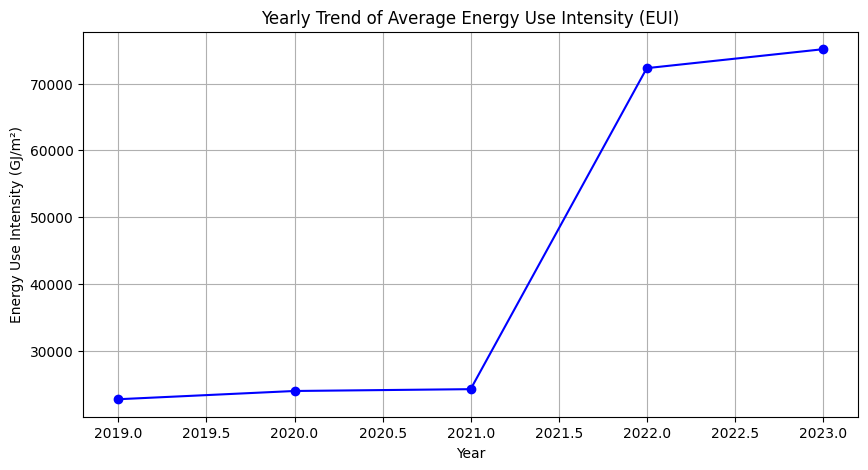

In [15]:
plt.figure(figsize=(10, 5))
x = GHG_by_year['Year Ending']
y = GHG_by_year['Total GHG Emissions']
plt.plot(x,y, marker='o', linestyle='-', color='b')
plt.title("Yearly Trend of Average Energy Use Intensity (EUI)")
plt.xlabel("Year")
plt.ylabel("Energy Use Intensity (GJ/m²)")
plt.grid()
plt.show()

**3.2 Comparative Bar Charts**

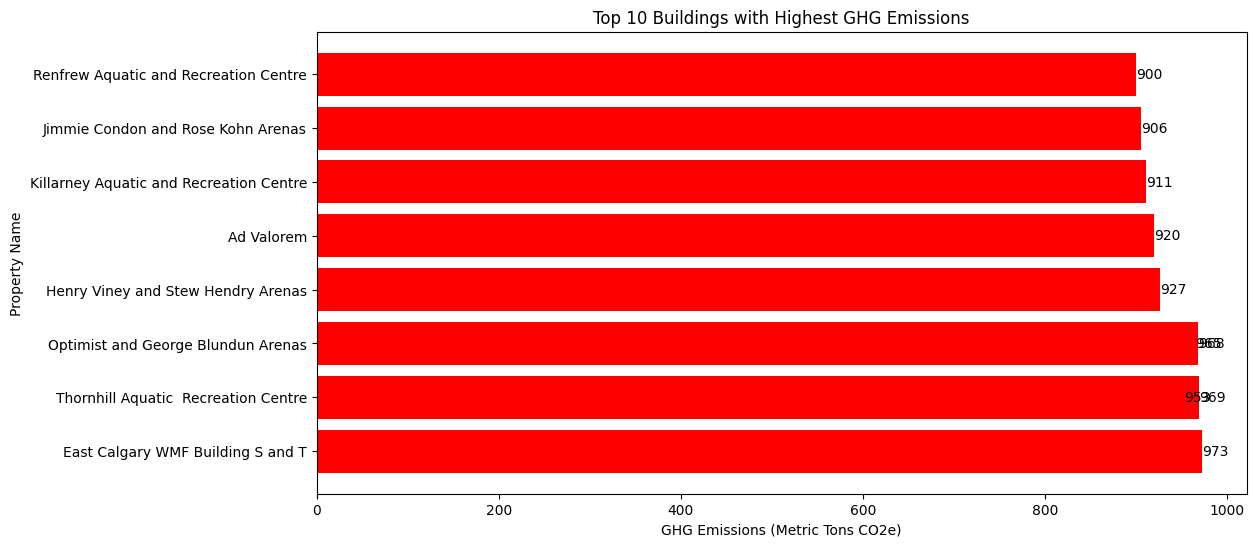

In [16]:
top_10_ghg = df.nlargest(10, 'Total GHG Emissions (Metric Tons CO2e)')
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_ghg['Property Name'], top_10_ghg['Total GHG Emissions (Metric Tons CO2e)'], color='red')
plt.xlabel("GHG Emissions (Metric Tons CO2e)")
plt.ylabel("Property Name")
plt.title("Top 10 Buildings with Highest GHG Emissions")
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.0f}", va='center')
plt.show()

**3.3 Heatmap Visualization**

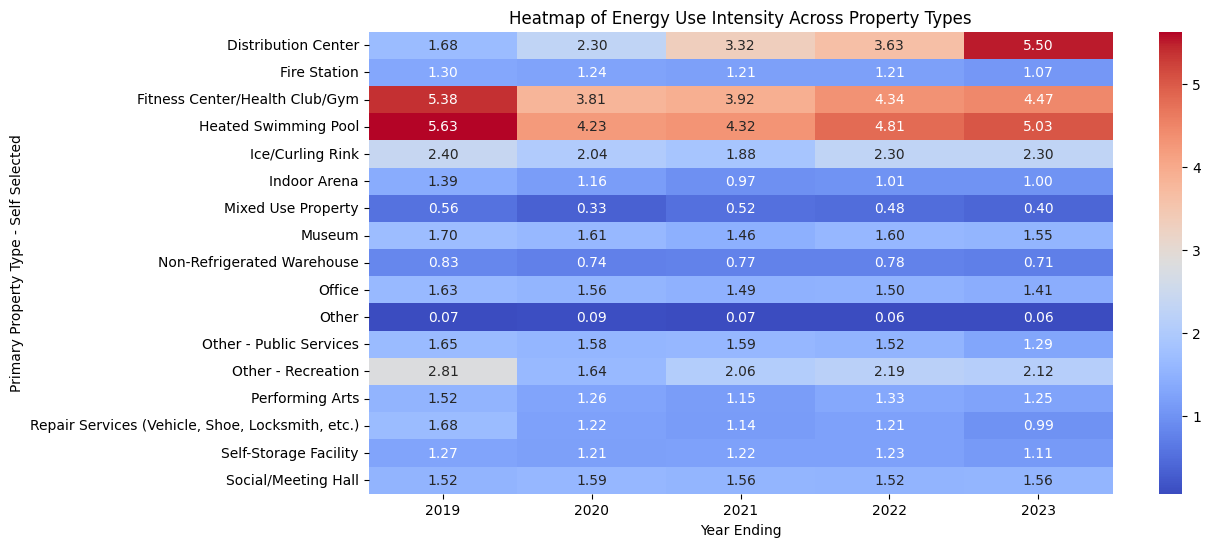

In [17]:
heatmap_data = df.pivot_table(index='Primary Property Type - Self Selected', columns='Year Ending', values='Site EUI (GJ/m²)', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Energy Use Intensity Across Property Types")
plt.show()

**Part 4**

**Correlation Analysis**

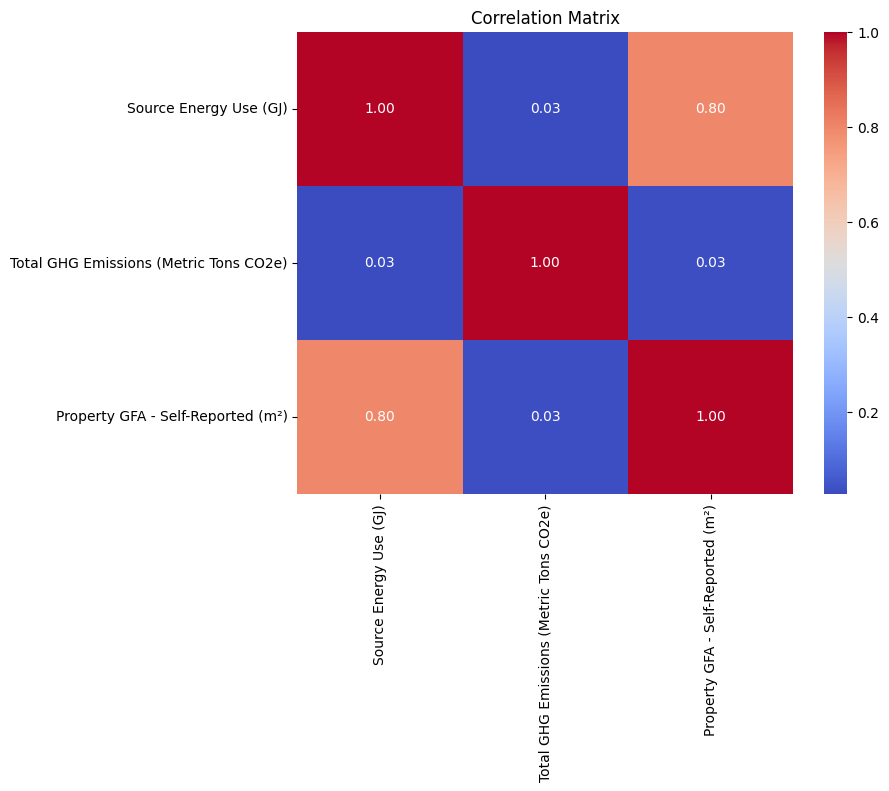

In [18]:
correlation_matrix = df[['Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**4.2 Hypothesis Testing**

In [19]:
import pandas as pd
from scipy.stats import ttest_ind
# Get all unique property types
property_types = df['Primary Property Type - Self Selected'].unique()

# Create an empty list to store results
results = []

# Perform t-tests for all pairs of property types
for i in range(len(property_types)):
    for j in range(i + 1, len(property_types)):
        type1 = property_types[i]
        type2 = property_types[j]

        # Extract GHG emissions data for each property type (and handle missing values)
        group1_scores = df[df['Primary Property Type - Self Selected'] == type1]['Total GHG Emissions (Metric Tons CO2e)'].dropna()
        group2_scores = df[df['Primary Property Type - Self Selected'] == type2]['Total GHG Emissions (Metric Tons CO2e)'].dropna()

        # Perform t-test if both groups have enough data
        if len(group1_scores) > 1 and len(group2_scores) > 1:
            t_stat, p_value = ttest_ind(group1_scores, group2_scores)

            # Append results to the list
            results.append({
                'Property Type 1': type1,
                'Property Type 2': type2,
                'T-Statistic': t_stat,
                'P-Value': p_value,
                'Significant Difference': p_value < 0.05
            })

results_df = pd.DataFrame(results)
results_df.head()

,Property Type 1,Property Type 2,T-Statistic,P-Value,Significant Difference
0,Heated Swimming Pool,Office,6.588175,1.164547e-09,True
1,Heated Swimming Pool,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",0.407837,6.871650e-01,False
2,Heated Swimming Pool,Fitness Center/Health Club/Gym,1.669647,1.008860e-01,False
3,Heated Swimming Pool,Indoor Arena,7.337952,8.198773e-07,True
4,Heated Swimming Pool,Non-Refrigerated Warehouse,4.042247,3.751666e-04,True


**Additional Tasks**

   Year Ending  Year Built  Building Age
0         2023        2010            13
1         2023        1981            42
2         2023        1974            49
3         2023        1979            44
4         2023        2000            23
Correlation between Building Age and Site EUI (GJ/m²): 0.1677394006834958


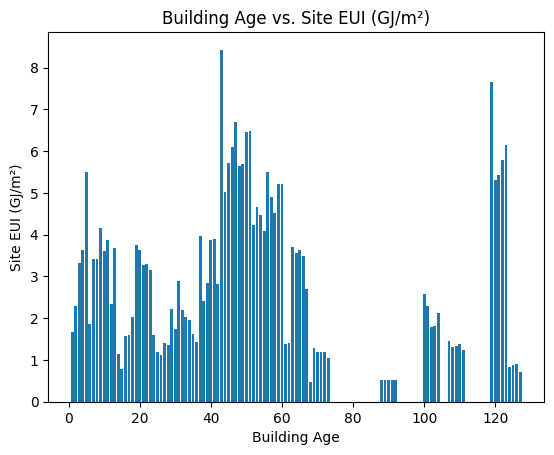

In [20]:
import pandas as pd

df['Building Age'] = df['Year Ending'] - df['Year Built']
print(df[['Year Ending', 'Year Built', 'Building Age']].head())

# Calculating the correlation between the two columns
correlation = df['Building Age'].corr(df['Site EUI (GJ/m²)'])
print(f"Correlation between Building Age and Site EUI (GJ/m²): {correlation}")

# Create a scatter plot to visualize the relationship
import matplotlib.pyplot as plt
plt.bar(df['Building Age'], df['Site EUI (GJ/m²)'])
plt.xlabel('Building Age')
plt.ylabel('Site EUI (GJ/m²)')
plt.title('Building Age vs. Site EUI (GJ/m²)')
plt.show()

In [21]:
import pandas as pd
import re

def clean_property_name(name):

  # Removing special characters and extra spaces
  cleaned_name = re.sub(r'[^\w\s]', '', name).strip()
  # Converting to title case
  cleaned_name = ' '.join(word.capitalize() for word in cleaned_name.split())
  return cleaned_name

def clean_address(address):
  # Removing special characters
  cleaned_address = re.sub(r'[^\w\s\.,-]', '', address)
  # Standardizing street number format
  cleaned_address = re.sub(r'(\d+)\s+(\w+)', r'\1 \2', cleaned_address)
  # Standardizing street type abbreviations
  cleaned_address = re.sub(r'\b(St|Street|st|ST)\b', 'Street', cleaned_address)
  cleaned_address = re.sub(r'\b(Ave|Avenue|AV|av|Av)\b', 'Avenue', cleaned_address)
  cleaned_address = re.sub(r'\b(Rd|Road)\b', 'Road', cleaned_address)
  cleaned_address = re.sub(r'\b(Blvd|Boulevard)\b', 'Boulevard', cleaned_address)
  cleaned_address = re.sub(r'\b(Dr|Drive)\b', 'Drive', cleaned_address)
  return cleaned_address
df['Property Name'] = df['Property Name'].apply(clean_property_name)
df['Address 1'] = df['Address 1'].apply(clean_address)
df.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID,Building Age
0,10176804,Acadia Aquatic Fitness Centre,9009 Fairmount Drive SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,152.4,368616,5453,"2,588.40",77834.334091,368616.0,171.0,2023,2023-10176804,13
1,6169481,Ad Valorem,2924 11 Street NE,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,31.2,1091854,4725,"2,588.40",77834.334091,1091854.0,508.0,2023,2023-6169481,42
2,6305956,Alberta Trade Centre,315 10 Avenue SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.0,508589,3,2180,77834.334091,508589.0,236.0,2023,2023-6305956,49
3,8854296,Andrew Davison,133 6 Avenue SE,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,...,1.5,1152308,506,6582,77834.334091,1152308.0,536.0,2023,2023-8854296,44
4,21988603,Animal Services Centre,2201 PORTLAND Street SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,118.1,508594,4926,"2,588.40",77834.334091,508594.0,236.0,2023,2023-21988603,23


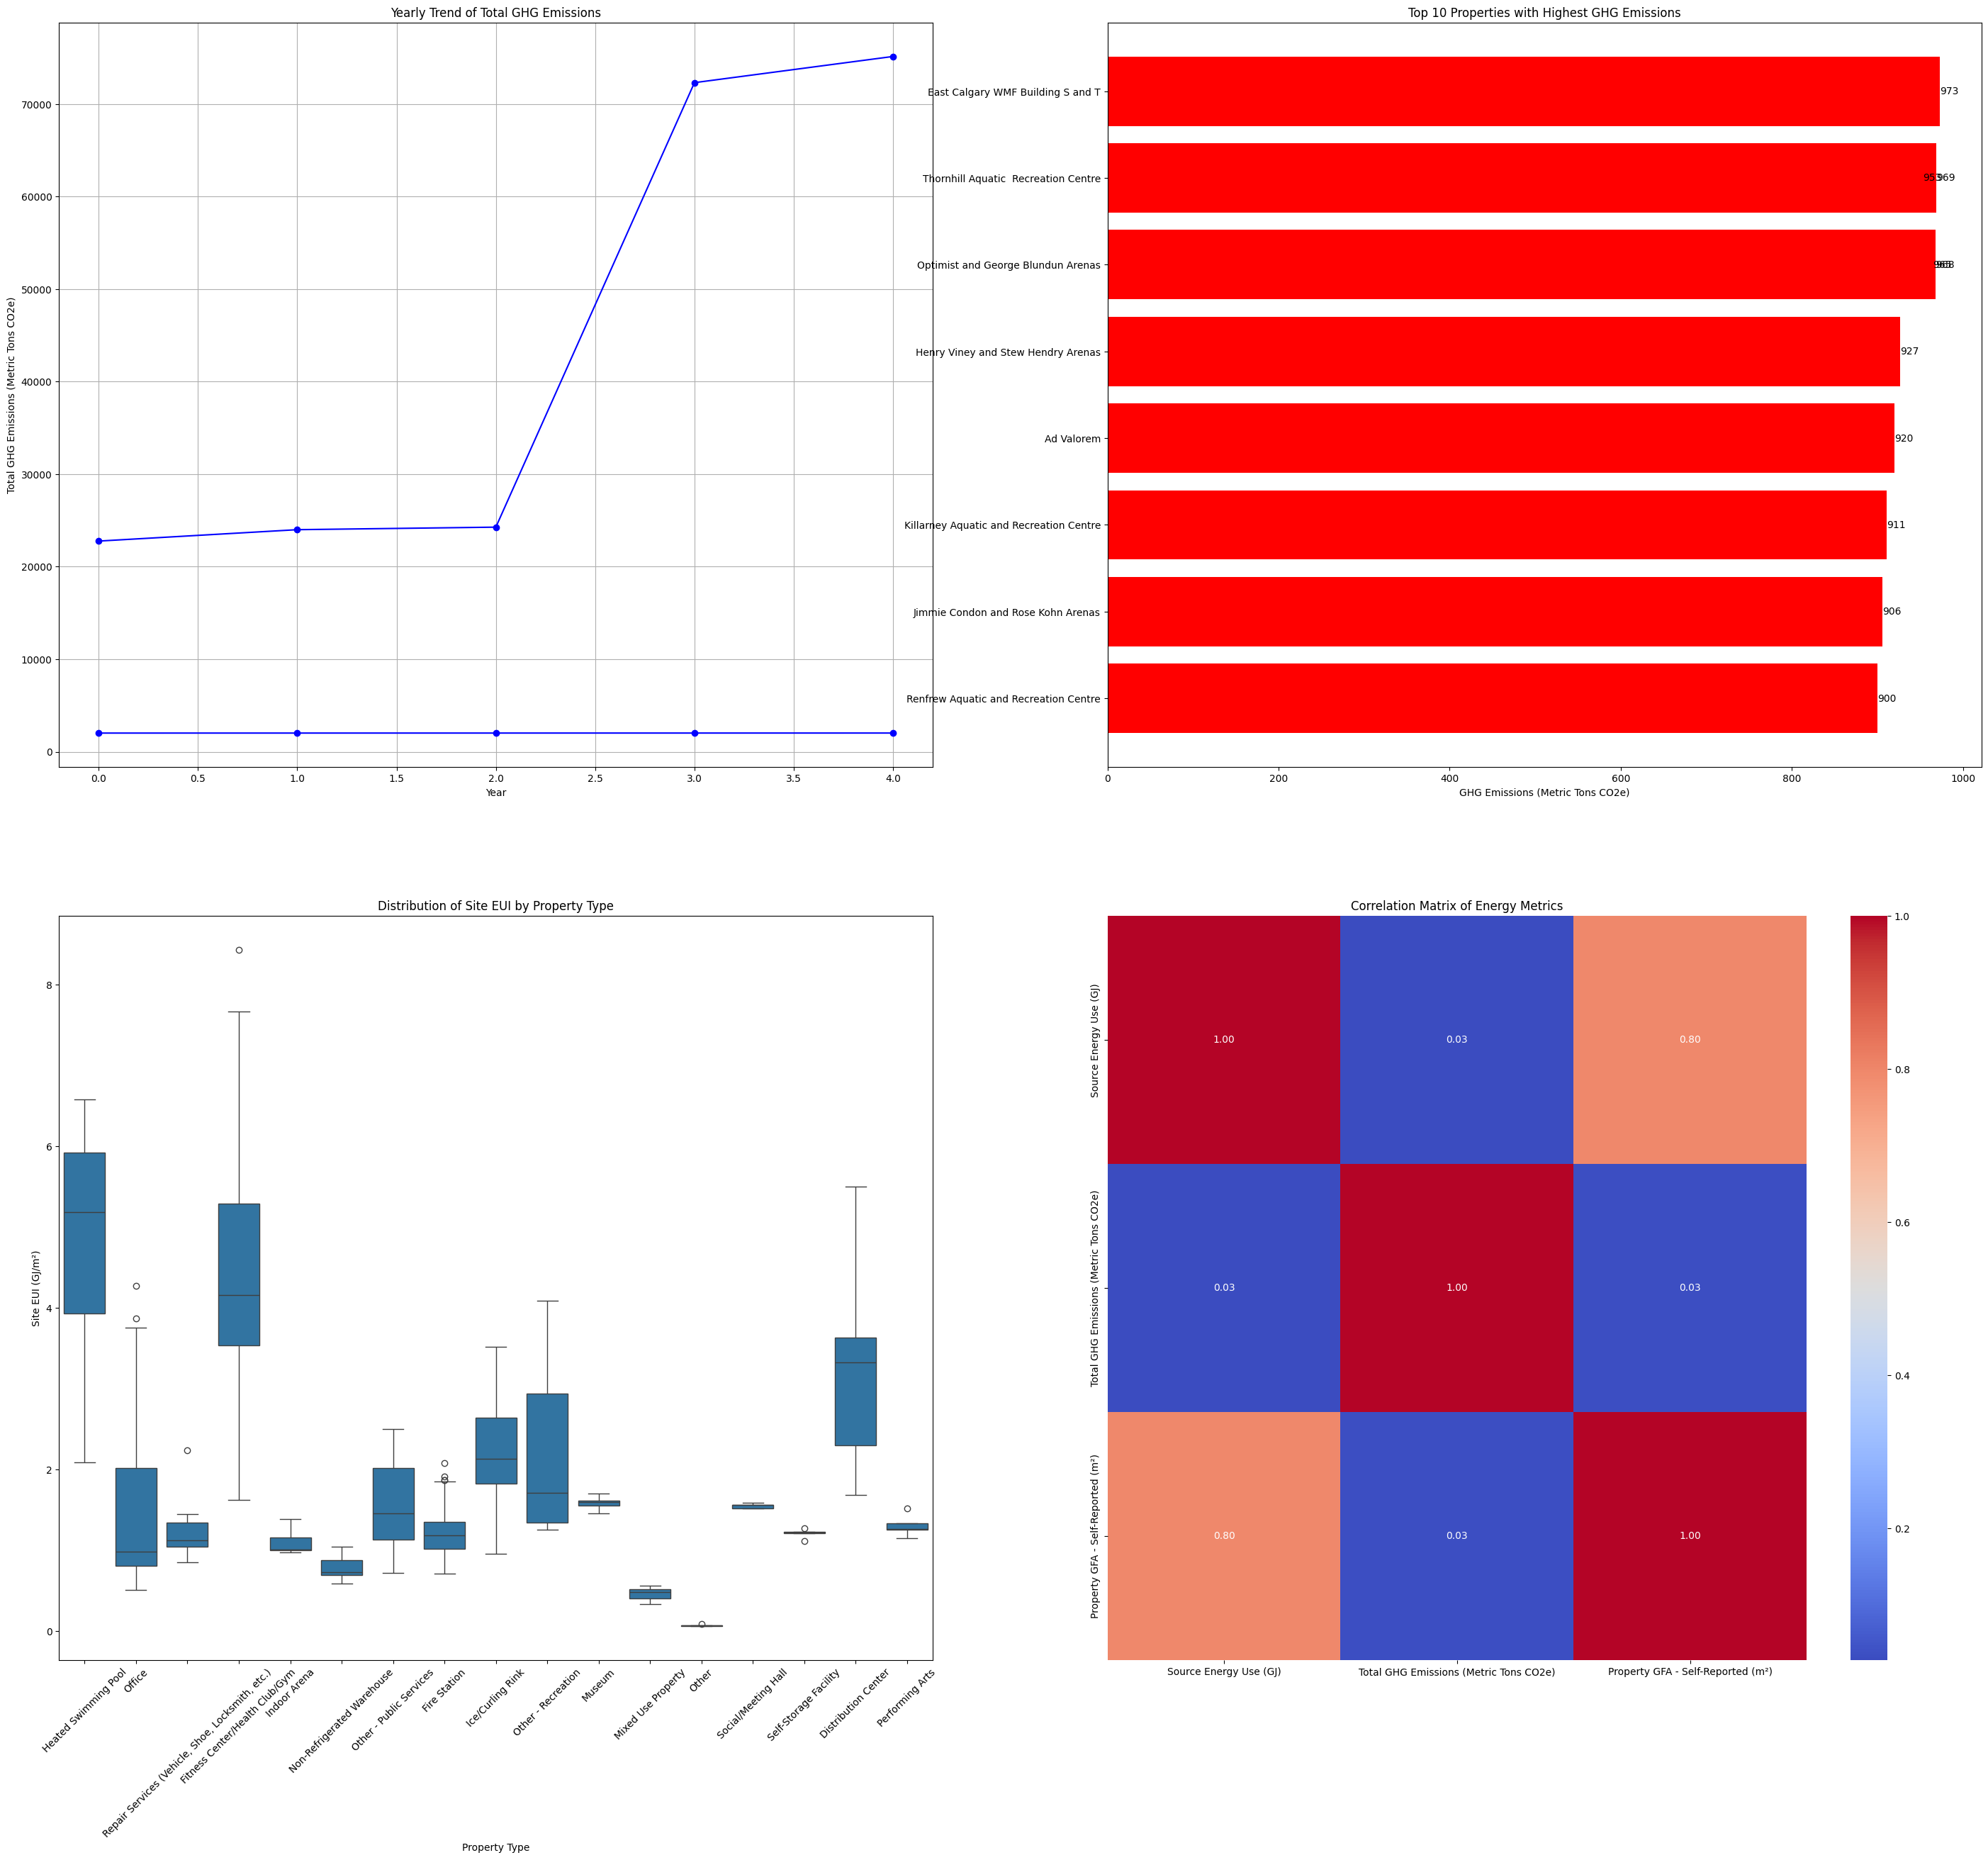

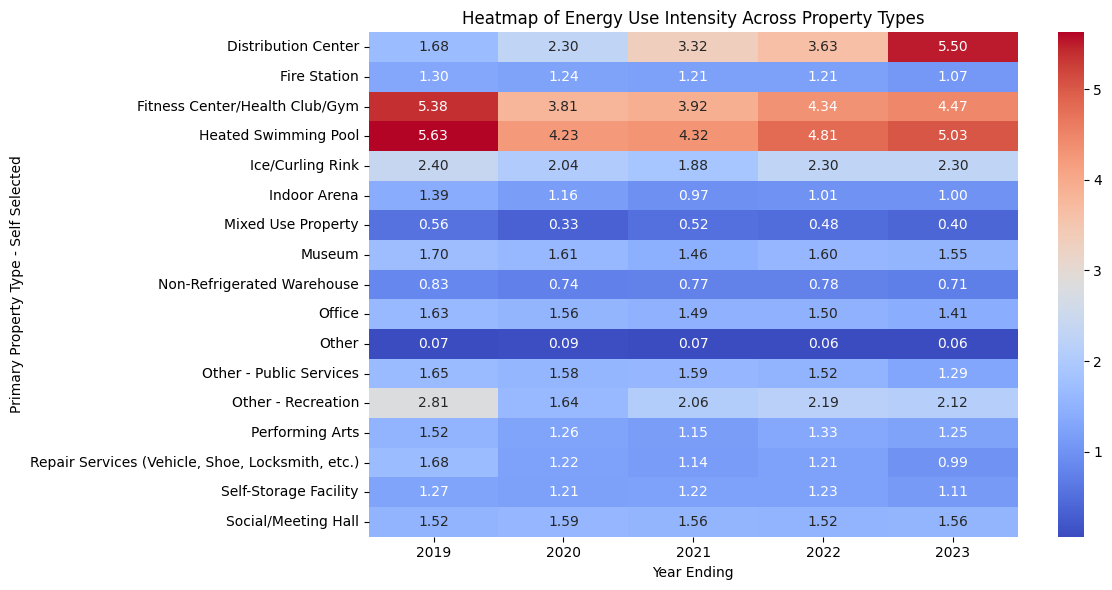

In [22]:
# Creating the dashboard-style visualization
fig, axes = plt.subplots(2, 2, figsize=(35, 30))

# Plot 1: Time-Series Trend of GHG Emissions
axes[0, 0].plot(GHG_by_year.index, GHG_by_year.values, marker='o', linestyle='-', color='b')
axes[0, 0].set_title('Yearly Trend of Total GHG Emissions')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total GHG Emissions (Metric Tons CO2e)')
axes[0, 0].grid()

# Plot 2: Bar Chart of Top 10 Buildings with Highest GHG Emissions
bars = axes[0, 1].barh(top_10_ghg['Property Name'], top_10_ghg['Total GHG Emissions (Metric Tons CO2e)'], color='red')
axes[0, 1].set_title('Top 10 Properties with Highest GHG Emissions')
axes[0, 1].set_xlabel('GHG Emissions (Metric Tons CO2e)')
axes[0, 1].invert_yaxis()  # Highest values at the top
for bar in bars:
    axes[0, 1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.0f}", va='center')

# Plot 3: Box Plot of Site Energy Use Intensity (EUI) by Property Type
sns.boxplot(x='Primary Property Type - Self Selected', y='Site EUI (GJ/m²)', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Site EUI by Property Type')
axes[1, 0].set_xlabel('Property Type')
axes[1, 0].set_ylabel('Site EUI (GJ/m²)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Correlation Heatmap between Energy Metrics
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix of Energy Metrics')

# Plot 5: Heatmap of Energy Use Intensity Across Property Types
heatmap_data = df.pivot_table(index='Primary Property Type - Self Selected', columns='Year Ending', values='Site EUI (GJ/m²)', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Energy Use Intensity Across Property Types")


# Adjust layout and display the dashboard
plt.tight_layout()
plt.show()
